<a href="https://colab.research.google.com/github/Asuskf/DBSCAN/blob/master/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install googledrivedownloader
!pip install simpledbf
!pip install geopandas

In [20]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
from simpledbf import Dbf5
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [21]:
gdd.download_file_from_google_drive(file_id='1THOK61fWZpszf1tbNrcnBtTGL7QVeme4',
                                    dest_path='./data/1.zip',
                                    unzip=True)

Unzipping...Done.


In [22]:
!rm ./data/1.zip

In [23]:
dbf0 = Dbf5('./data/Intersec Seg_14.dbf')
dbf1 = Dbf5('./data/Intersec Seg_15.dbf')

In [24]:
df0 = dbf0.to_dataframe()
df1 = dbf1.to_dataframe()

In [25]:
print(df0)

      FID_ROBOPE  FECHA_DENU DIRECCION_  ... BARRIO_ID     Lat_y     Long_x
0           7844  2014-12-29        NaN  ...  10010023 -0.406807 -78.501287
1           3840  2014-07-01        NaN  ...  10010030 -0.382786 -78.507353
2           1225  2014-02-24        NaN  ...  10010030 -0.382786 -78.507353
3           6771  2014-11-14        NaN  ...  10010030 -0.382786 -78.507353
4           7637  2014-12-19        NaN  ...  10010030 -0.382786 -78.507353
...          ...         ...        ...  ...       ...       ...        ...
8044        6788  2014-11-15        NaN  ...  05080021  0.025231 -78.452118
8045        6842  2014-11-18        NaN  ...  05080021  0.025231 -78.452118
8046        3399  2014-06-10        NaN  ...  06010004  0.062206 -78.681690
8047        5154  2014-09-02        NaN  ...  06040012  0.143781 -78.766895
8048        7238  2014-12-04        NaN  ...  06040004  0.177097 -78.777489

[8049 rows x 22 columns]


In [26]:
print(df1)

      FID_ROBOPE  FECHA_DENU  ...     Lat_y     Long_x
0           1089  2015-02-25  ... -0.400815 -78.472150
1            933  2015-02-17  ... -0.379236 -78.499077
2           1281  2015-03-06  ... -0.377219 -78.480028
3           1238  2015-03-04  ... -0.376291 -78.506284
4           2650  2015-05-08  ... -0.376291 -78.506284
...          ...         ...  ...       ...        ...
3627        1218  2015-03-03  ...  0.108128 -78.709254
3628        2246  2015-04-17  ...  0.108128 -78.709254
3629        1327  2015-03-09  ...  0.134497 -78.370831
3630        3176  2015-06-08  ...  0.143781 -78.766895
3631        1156  2015-02-28  ...  0.216790 -78.584616

[3632 rows x 22 columns]


In [27]:
result = pd.concat([df0, df1], axis=0)

In [28]:
print(result)

      FID_ROBOPE  FECHA_DENU  ...     Lat_y     Long_x
0           7844  2014-12-29  ... -0.406807 -78.501287
1           3840  2014-07-01  ... -0.382786 -78.507353
2           1225  2014-02-24  ... -0.382786 -78.507353
3           6771  2014-11-14  ... -0.382786 -78.507353
4           7637  2014-12-19  ... -0.382786 -78.507353
...          ...         ...  ...       ...        ...
3627        1218  2015-03-03  ...  0.108128 -78.709254
3628        2246  2015-04-17  ...  0.108128 -78.709254
3629        1327  2015-03-09  ...  0.134497 -78.370831
3630        3176  2015-06-08  ...  0.143781 -78.766895
3631        1156  2015-02-28  ...  0.216790 -78.584616

[11681 rows x 22 columns]


In [29]:
result = result.drop(columns=['FECHA_DEL_','TipoDeRobo', 'FECHA_DENU', 'FID_ROBOPE',  'DIRECCION_', 
                              'Horario',  'TIPO_DE_AG', 'Masculino', 'Femenino', 'Administra', 'Barrio', 
                              'Parroquia', 'Urbana_Rur', 'Lugar','FID_Barrio', 'NOMBRE', 'BARRIO_ID', 'X', 'Y'])

In [30]:
print(result)

                   Modus     Lat_y     Long_x
0              HALADORES -0.406807 -78.501287
1           ASALTO COMÚN -0.382786 -78.507353
2           ASALTO COMÚN -0.382786 -78.507353
3     SUSTANCIAS EST.PSI -0.382786 -78.507353
4               SIN DATO -0.382786 -78.507353
...                  ...       ...        ...
3627            SIN DATO  0.108128 -78.709254
3628            SIN DATO  0.108128 -78.709254
3629        ASALTO COMÚN  0.134497 -78.370831
3630        ESTRUCHANTES  0.143781 -78.766895
3631            SIN DATO  0.216790 -78.584616

[11681 rows x 3 columns]


In [31]:
result = result.replace({'HALADORES':1, 'ASALTO COMÚN':2, 'SUSTANCIAS EST.PSI':3,
                        'CARTERISTAS':4, 'LANZAS':5, 'ESTRUCHANTES':6, 'ROBO EXPRESS':7,
                        'SACA PINTAS':8, 'ARRANCHADORES':9, 'OTROS':10, 'ROTURA DE VIDRIOS':11, 'DULCES SUEÑOS':12, 'SIN DATO':13})

In [32]:
print(result)

      Modus     Lat_y     Long_x
0         1 -0.406807 -78.501287
1         2 -0.382786 -78.507353
2         2 -0.382786 -78.507353
3         3 -0.382786 -78.507353
4        13 -0.382786 -78.507353
...     ...       ...        ...
3627     13  0.108128 -78.709254
3628     13  0.108128 -78.709254
3629      2  0.134497 -78.370831
3630      6  0.143781 -78.766895
3631     13  0.216790 -78.584616

[11681 rows x 3 columns]


In [33]:
coords = result[['Lat_y','Long_x']].to_numpy()

In [34]:
df = pd.DataFrame(result, columns=['Lat_y','Long_x'])
df.to_csv(r'coordenadas.csv')
print(coords)

[[ -0.40680749 -78.50128685]
 [ -0.38278557 -78.50735258]
 [ -0.38278557 -78.50735258]
 ...
 [  0.13449717 -78.3708306 ]
 [  0.14378128 -78.76689452]
 [  0.21679023 -78.58461591]]


In [35]:
kms_per_radian = 11550.0088 
epsilon = 1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 387


In [36]:
clusters.to_json(r'closterf.json')
print(clusters)

0                    [[-0.406807485395, -78.5012868512]]
1      [[-0.382785571337, -78.5073525778], [-0.382785...
2      [[-0.379235633437, -78.4990769958], [-0.379235...
3      [[-0.376290657033, -78.50628365], [-0.37629065...
4      [[-0.373000959654, -78.4929430117], [-0.373000...
                             ...                        
382                 [[0.00624438307739, -78.5676161095]]
383                    [[0.10029168023, -78.7516172272]]
384    [[0.108128305445, -78.7092544213], [0.10812830...
385                   [[0.134497167286, -78.3708305951]]
386                   [[0.216790228459, -78.5846159117]]
Length: 387, dtype: object


In [37]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [38]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Long_x':lons, 'Lat_y':lats})


In [39]:
print(rep_points)

        Long_x     Lat_y
0   -78.501287 -0.406807
1   -78.507353 -0.382786
2   -78.499077 -0.379236
3   -78.506284 -0.376291
4   -78.492943 -0.373001
..         ...       ...
382 -78.567616  0.006244
383 -78.751617  0.100292
384 -78.709254  0.108128
385 -78.370831  0.134497
386 -78.584616  0.216790

[387 rows x 2 columns]


In [40]:
rs = rep_points.apply(lambda row: result[(result['Lat_y']==row['Lat_y'])].iloc[0], axis=1)

In [41]:
print(result.groupby('Lat_y').size())

Lat_y
-0.406807    1
-0.400815    1
-0.382786    7
-0.379236    3
-0.377219    1
            ..
 0.108128    2
 0.134497    1
 0.143781    2
 0.177097    1
 0.216790    1
Length: 708, dtype: int64


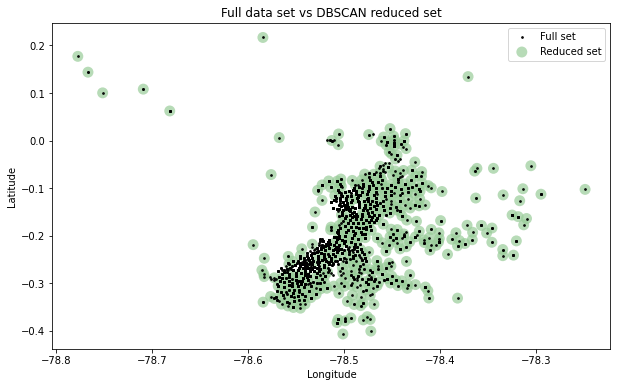

In [42]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Long_x'], rs['Lat_y'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(result['Long_x'], result['Lat_y'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [43]:
df = pd.DataFrame(rs, columns=['Lat_y', 'Long_x'])
print(df)

        Lat_y     Long_x
0   -0.406807 -78.501287
1   -0.382786 -78.507353
2   -0.379236 -78.499077
3   -0.376291 -78.506284
4   -0.373001 -78.492943
..        ...        ...
382  0.006244 -78.567616
383  0.100292 -78.751617
384  0.108128 -78.709254
385  0.134497 -78.370831
386  0.216790 -78.584616

[387 rows x 2 columns]


In [44]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Long_x'], df['Lat_y'])]
df = df.drop(['Long_x', 'Lat_y'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)


print(gdf)

                       geometry
0    POINT (-78.50129 -0.40681)
1    POINT (-78.50735 -0.38279)
2    POINT (-78.49908 -0.37924)
3    POINT (-78.50628 -0.37629)
4    POINT (-78.49294 -0.37300)
..                          ...
382   POINT (-78.56762 0.00624)
383   POINT (-78.75162 0.10029)
384   POINT (-78.70925 0.10813)
385   POINT (-78.37083 0.13450)
386   POINT (-78.58462 0.21679)

[387 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
